In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import heapq

In [12]:
G = nx.karate_club_graph()

In [13]:
def run_ic(G , seeds , p = 0.1 , simulations =100):
    total_spread = 0
    for _ in range(simulations):
        active = set(seeds)
        newly_active = set(seeds)
        while newly_active:
            next_active = set()
            for node in newly_active:
                for neighbor in G.neighbors(node):
                    if neighbor not in active and random.random() < p:
                        next_active.add(neighbor)
            newly_active = next_active
            active |= next_active
        total_spread += len(active)
    return total_spread/simulations
    

NameError: name 'seed_nodes' is not defined

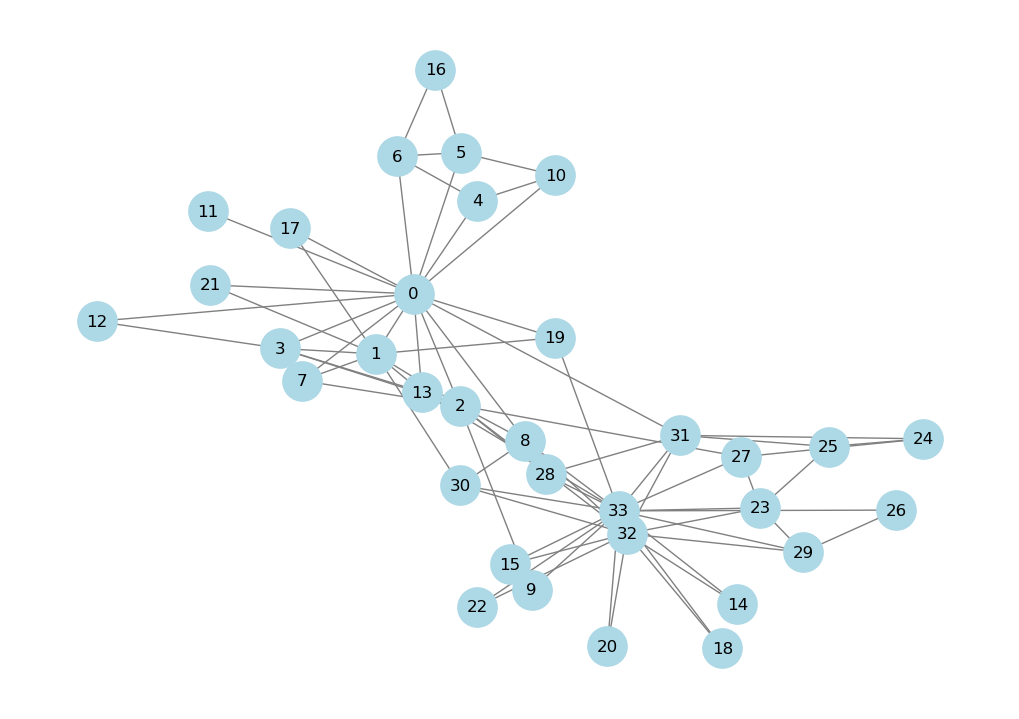

In [14]:
def celf(G , k = 3 , p = 0.1 , simulations = 100):
    S = []
    marg_gain = []
    node_gain = {}


    for node in G.nodes():
        gain = run_ic(G , [node] , p , simulations)
        marg_gain.append((-gain , node , 0)) 
        node_gain[node] = gain

    heapq.heapify(marg_gain)
    lookups = 0
    cur_iter = 1

    while len(S) < k:
        gain , node , prev_iter = heapq.heappop(marg_gain)
        gain = -gain
        if prev_iter == len(S):
            S.append(node)
        else:
            new_gain = run_ic(G , S+ [node] , p , simulations ) - run_ic(G , S , p , simulations)
            heapq.heappush(marg_gain,(-new_gain,node,len(S)))
            lookups += 1

    return S,lookups

selected_seeds , total_lookups = celf(G , k = 3 , p = 0.1 , simulations = 100)

pos = nx.spring_layout(G , seed = 42)
plt.figure(figsize=(10,7))
nx.draw(G,pos,with_labels=True,node_color = 'lightblue',node_size=800,edge_color='gray')
nx.draw_networkx_nodes(G,pos,nodelist = seed_nodes,node_color= 'red',node_size= 500,label='Seed Nodes')
plt.title("Influence Maximisation: CELF Optimisation")
plt.legend()
plt.show()